In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
result = pd.read_csv('../data/performances/default_multiA_lr=0.001_batch=32_lr_decay=0.5_decay_interval=10.csv')

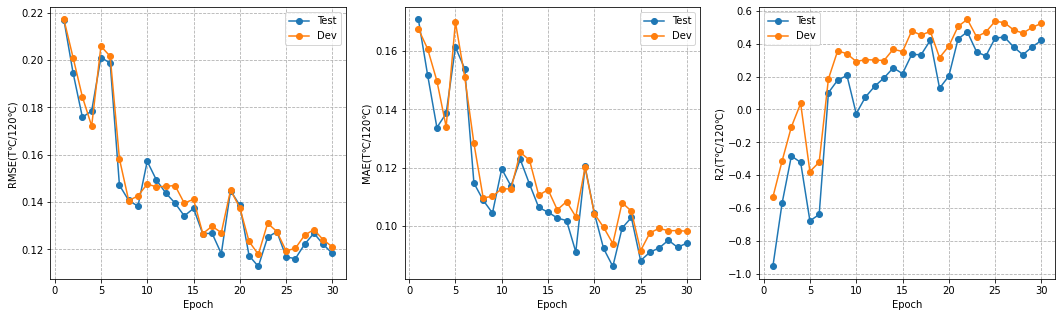

In [5]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(result['Epoch'], result['rmse_test'], marker='o',label='Test')
axs[0].plot(result['Epoch'], result['rmse_dev'],marker='o', label='Dev')
axs[0].set_ylabel('RMSE(T\u2103/120\u2103)')
axs[1].plot(result['Epoch'], result['mae_test'], marker='o', label='Test')
axs[1].plot(result['Epoch'], result['mae_dev'], marker='o', label='Dev')
axs[1].set_ylabel('MAE(T\u2103/120\u2103)')
axs[2].plot(result['Epoch'], result['r2_test'], marker='o', label='Test')
axs[2].plot(result['Epoch'], result['r2_dev'], marker='o', label='Dev')
axs[2].set_ylabel('R2(T\u2103/120\u2103)')
for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.grid(linestyle='--')

# code test

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from functions import *
device = torch.device('cpu')
import esm

In [ ]:
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3","KALTARQQEVFDLIRDISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEERILERSKEPVSGAQLAEELSVSRQVIVQDI") ]

In [ ]:
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
batch_labels, batch_strs, batch_tokens = batch_converter(data)

In [ ]:
with torch.no_grad():
    emb = model(batch_tokens, repr_layers=[6], return_contacts=True)